In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [2]:
# Charger l'ensemble de données
data = pd.read_parquet('NORWAY_INFLOW_2018-2022.parquet')
data.to_csv('NORWAY_INFLOW_2018-2022.csv')
data = pd.read_csv('NORWAY_INFLOW_2018-2022.csv')

In [3]:
# Créer une colonne 'Time_id' pour combiner 'Year' et 'Week' en une seule colonne
# Cela facilite la manipulation des données temporelles dans les étapes ultérieures.
data['time_id'] = data['year'].astype(str) + '-' + data['week'].astype(str)

# Convertir la colonne 'Time_id' en objet datetime
# Cela permet d'utiliser les fonctionnalités de manipulation de date et d'heure de pandas.
data['time_id'] = pd.to_datetime(data['time_id'] + '-1', format='%Y-%W-%w')


In [4]:
#Identifiez les colonnes de caractéristiques et la colonne cible:
feature_columns = [col for col in data.columns if col not in ['year', 'week', 'entsoe_inflow', 'time_id']]
target_column = 'entsoe_inflow'
#Créez les ensembles de données X (caractéristiques) et y (cible):
X = data[feature_columns]
y = data[target_column]
#Divisez les données en ensembles d'entraînement et de test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Créer une instance du modèle
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs de l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les métriques d'évaluation
print("Mean Squared Error (MSE) : ", mse)
# Erreur quadratique moyenne (Mean Squared Error, MSE) : 
# Il s'agit de la moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles. 
# Plus la MSE est faible, meilleure est la performance du modèle. 


print("Mean Absolute Error (MAE) : ", mae)
# Erreur absolue moyenne (Mean Absolute Error, MAE) : 
# Il s'agit de la moyenne des valeurs absolues des erreurs entre les valeurs prédites et les valeurs réelles.
# La MAE est moins sensible aux erreurs extrêmes que la MSE


print("R-squared (R2) : ", r2)
# Coefficient de détermination (R²) : 
# Il s'agit d'une mesure statistique qui évalue à quel point les prédictions du modèle correspondent aux valeurs réelles. 
# R² varie de 0 à 1, où 1 indique une correspondance parfaite et 0 indique aucune correspondance. 

Mean Squared Error (MSE) :  6662081071079.295
Mean Absolute Error (MAE) :  1668268.7951066229
R-squared (R2) :  -0.4480473566280665


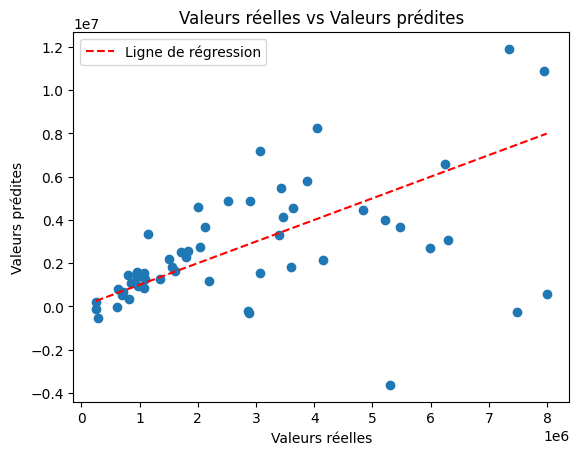

In [6]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Créer un scatter plot des valeurs réelles par rapport aux valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")

# Créer une ligne de régression
regression_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(regression_line, regression_line, color='red', linestyle='--', label="Ligne de régression")

plt.legend()
plt.title("Valeurs réelles vs Valeurs prédites")
plt.show()

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]